In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
olist_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-husnetdinov/my_project_e_commerce/olist_customers_dataset.csv')
# информация о пользователях 

In [4]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
olist_order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-husnetdinov/my_project_e_commerce/olist_order_items_dataset.csv')
# информация о статусе заказов

In [6]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
olist_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-husnetdinov/my_project_e_commerce/olist_orders_dataset.csv')
# информация о заказах

In [8]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [9]:
orders_by_customers = olist_customers.merge(olist_orders,on='customer_id', how='left')

In [10]:
orders_by_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [11]:
orders_by_customers.loc[orders_by_customers['order_status']=='delivered'] \
                    .groupby('customer_unique_id', as_index= False) \
                    .agg({'order_status':'count'}).query('order_status == 1').shape[0]

90557

90557 пользователей сделали по одному заказу

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [12]:
olist_orders.groupby('order_id', as_index=False).agg({'order_status':'count'}).order_status.unique()


array([1])

In [13]:
#у каждого заказа только один статус

In [14]:
olist_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [15]:
olist_orders.order_purchase_timestamp = pd.to_datetime(olist_orders.order_purchase_timestamp)

In [16]:
not_delivered_orders = olist_orders.query('order_status != "delivered"') \
            .groupby([pd.Grouper(freq="MS", key='order_purchase_timestamp'),'order_status'], as_index=False) \
            .agg({'order_id':'count'})\
            .groupby('order_status', as_index=False) \
            .agg({'order_id':'mean'}) \
            .rename(columns={'order_id':'avg'})

In [17]:
not_delivered_orders

,order_status,avg
0,approved,1.000000
1,canceled,26.041667
2,created,1.666667
3,invoiced,14.952381
4,processing,15.842105
5,shipped,48.130435
6,unavailable,29.000000


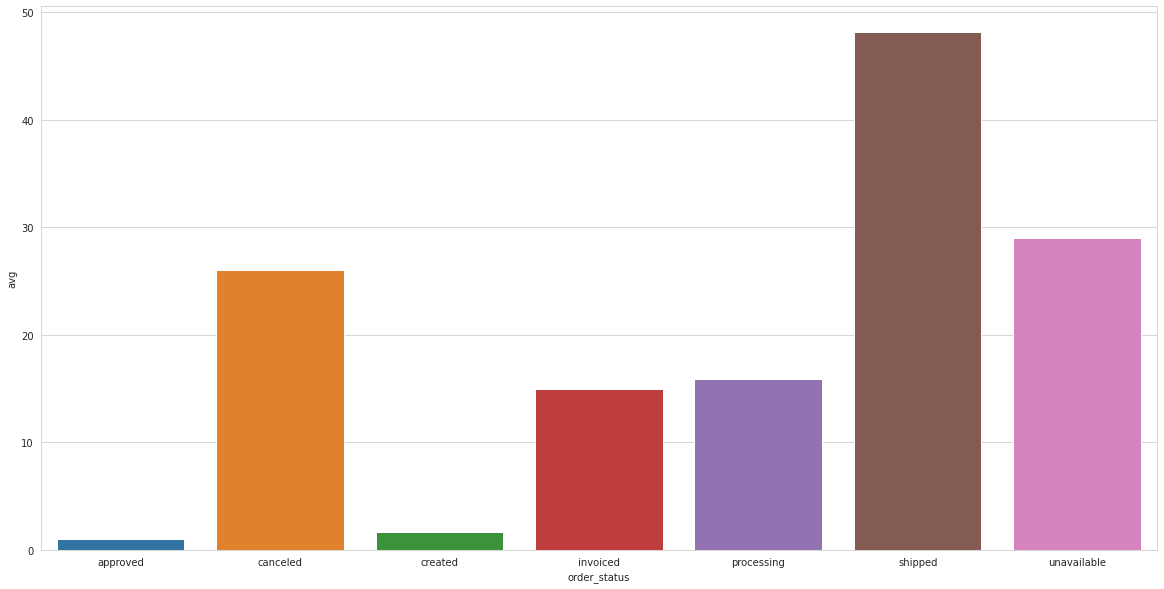

In [18]:
fig, scatter = plt.subplots(figsize = (20,10))
sns.barplot(x='order_status',y='avg', data=not_delivered_orders)

Предпложим, что статусы approved, canceled, created, invoiced относятся к незавершенным заказам по вине заказчика. 
Статус unavailable и processing заказ не завершен по вине маркетплейса. 
Статус shipped заказ не завершен по вине службы доставки. 

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [19]:
products_by_orders = olist_orders.merge(olist_order_items, how='left',on='order_id')[['product_id','order_purchase_timestamp','order_status']]

In [20]:
products_by_orders.dropna()

,product_id,order_purchase_timestamp,order_status
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,delivered
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,delivered
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,delivered
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,delivered
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,delivered
...,...,...,...
113420,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06 12:58:58,delivered
113421,b80910977a37536adeddd63663f916ad,2017-08-27 14:46:43,delivered
113422,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,delivered
113423,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,delivered


In [21]:
products_by_orders['day_of_week'] = products_by_orders['order_purchase_timestamp'].dt.day_name ()

In [22]:
products_by_orders.query('order_status =="delivered"')\
                  .groupby(['product_id','day_of_week'], as_index=False)\
                  .agg({'order_status':'count'})\
                  .drop_duplicates(subset=['product_id'])\
                  .sort_values('order_status', ascending=False)

,product_id,day_of_week,order_status
40179,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83
15591,422879e10f46682990de24d770e7f83d,Friday,77
35750,99a4788cb24856965c36a24e339b6058,Friday,74
12745,368c6c730842d78016ad823897a372db,Friday,67
19656,53759a2ecddad2bb87a079a1f1519f73,Friday,58
...,...,...,...
22023,5d5a63339d6a39230bf2a276e8f8fe1c,Thursday,1
22022,5d5a4bac98d0066fe4c630ea3bcf5e13,Tuesday,1
22021,5d5472bc6ef147ff1d2ca0b78127caae,Thursday,1
22016,5d52927f3cf2e3266c5dd6e4d2dd566a,Monday,1


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

In [23]:
orders_by_customers.order_purchase_timestamp = pd.to_datetime(orders_by_customers.order_purchase_timestamp)

In [24]:
orders_by_month = orders_by_customers[['customer_unique_id','customer_id','order_id','order_status','order_purchase_timestamp']]

In [25]:
orders_by_month['month']=orders_by_month['order_purchase_timestamp'].dt.month_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
orders_by_month['month']=orders_by_month['order_purchase_timestamp'].dt.month_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
orders_by_month['weeks']=orders_by_month['order_purchase_timestamp'].dt.days_in_month/7
#число недель по месяцам

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
orders_by_month.head()

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,month,weeks
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,May,4.428571
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,January,4.428571
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,May,4.428571
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,March,4.428571
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,July,4.428571


In [29]:
orders_by_weeks = orders_by_month.query('order_status == "delivered"')\
               .groupby(['customer_unique_id','month','weeks'], as_index=False)\
               .agg({'order_id':'count'})\
               .groupby(['customer_unique_id','month','weeks'], as_index=False)\
               .agg({'order_id':'sum'})\
               .rename(columns={"order_id": "number_of_orders"})

In [30]:
orders_by_weeks.head()

,customer_unique_id,month,weeks,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,4.428571,1
2,0000f46a3911fa3c0805444483337064,March,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,October,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,November,4.285714,1


In [31]:
orders_by_weeks['avg_orders_by_week'] = orders_by_weeks.number_of_orders/orders_by_month.weeks

In [32]:
orders_by_weeks
#число покупок по неделям

,customer_unique_id,month,weeks,number_of_orders,avg_orders_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,March,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,October,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,November,4.285714,1,0.225806
...,...,...,...,...,...
95150,fffcf5a5ff07b0908bd4e2dbc735a684,June,4.285714,1,0.225806
95151,fffea47cd6d3cc0a88bd621562a9d061,December,4.428571,1,0.250000
95152,ffff371b4d645b6ecea244b27531430a,February,4.000000,1,0.233333
95153,ffff5962728ec6157033ef9805bacc48,May,4.428571,1,0.225806


### 5. Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

In [33]:
df = olist_customers.merge(olist_orders,on='customer_id')
# объединяем 2 датафрейма

In [34]:
df = df.query('order_status == "delivered"')[['customer_unique_id','order_id','order_purchase_timestamp', 'order_status']]
# отбираем только доставленные заказы

In [35]:
df['order_purchase_timestamp']= pd.to_datetime(df['order_purchase_timestamp'],format='%Y-%m-%d')
# переводим дату в правильный формат

In [36]:
month_of_first_order = df.groupby('customer_unique_id',as_index=False) \
    .agg({'order_purchase_timestamp':'min'})\
    .rename(columns={"order_purchase_timestamp": "month_of_first_order"})

# задаем столбец с месяцем первого успешного заказа

In [37]:
month_of_first_order['month_of_first_order']=month_of_first_order['month_of_first_order'].astype('datetime64[M]')
# переводим дату к формату месяца

In [38]:
month_of_first_order

,customer_unique_id,month_of_first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
93355,ffff371b4d645b6ecea244b27531430a,2017-02-01
93356,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [39]:
df['month_of_order']=df['order_purchase_timestamp'].astype('datetime64[M]')
# задаем столбец с месяцами заказов

In [40]:
min_date = df['month_of_order'].min()
max_date = df['month_of_order'].max()
# задаем рамки календаря

In [41]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [42]:
month.columns = ['month']

In [43]:
month_of_first_order['key'] = 1
month['key'] = 1
#ключ по которому будем объединять юзеров и месяц

In [44]:
month_of_first_order = month_of_first_order.merge(month, on = 'key')[['customer_unique_id','month_of_first_order','month']]

In [45]:
month_of_first_order.head()

,customer_unique_id,month_of_first_order,month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-09-01
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-10-01
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-11-01
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2016-12-01
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-01-01


In [46]:
month_of_first_order = month_of_first_order[month_of_first_order['month'] >= month_of_first_order['month_of_first_order']]
# фильтруем, чтобы календарь пользователя начинался от даты его первого заказа

In [47]:
df['month'] = df['month_of_order']
#задаем новый столбец, по которому будем объединять два датафрейма

In [48]:
users_activity = month_of_first_order.merge(df, on = ['customer_unique_id','month'], how = 'left')[['customer_unique_id','month_of_first_order','month','month_of_order']]

In [49]:
users_activity['active'] = (users_activity ['month'] == users_activity ['month_of_order'])*1
# столбец, в котором будем отслеживать активность юзеров
#1 - активен в этом месяце
#0 - не активен в этом месяце

In [50]:
users_activity['lifetime'] = ((users_activity ['month'] - users_activity['month_of_first_order'])
                      /np.timedelta64(1, 'M')).round().astype(int)
# месяцы от начала деятельности на маркеплейсе (от первого доставленного заказа)

In [51]:
retention = users_activity.pivot_table(index='month_of_first_order',columns='lifetime',values='active',aggfunc='mean')
# сводная таблица

In [52]:
retention.round(4)
# ретеншн датафрейма

lifetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_of_first_order,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0
2016-10-01,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0038,...,0.0000,0.0038,0.0000,0.0038,0.0,0.0076,0.0076,0.0,0.0,NaN
2016-12-01,1.0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,NaN,NaN
2017-01-01,1.0,0.0028,0.0028,0.0014,0.0042,0.0014,0.0042,0.0014,0.0014,0.0000,...,0.0014,0.0014,0.0028,0.0042,0.0,0.0014,NaN,NaN,NaN,NaN
2017-02-01,1.0,0.0018,0.0031,0.0012,0.0043,0.0012,0.0025,0.0018,0.0012,0.0018,...,0.0012,0.0006,0.0006,0.0018,0.0,NaN,NaN,NaN,NaN,NaN
2017-03-01,1.0,0.0048,0.0036,0.0048,0.0036,0.0016,0.0016,0.0032,0.0032,0.0008,...,0.0016,0.0024,0.0008,0.0012,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,1.0,0.0066,0.0027,0.0022,0.0027,0.0027,0.0040,0.0031,0.0031,0.0018,...,0.0009,0.0009,0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,1.0,0.0049,0.0046,0.0029,0.0029,0.0035,0.0046,0.0014,0.0026,0.0032,...,0.0017,0.0020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.0053,0.0043,0.0043,0.0033,0.0040,0.0036,0.0023,0.0013,0.0020,...,0.0033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
retention[retention[3] == retention[3].max()].index
# максимальный ретеншн на третий месяц у когорты 2017-03-01

DatetimeIndex(['2017-03-01'], dtype='datetime64[ns]', name='month_of_first_order', freq=None)

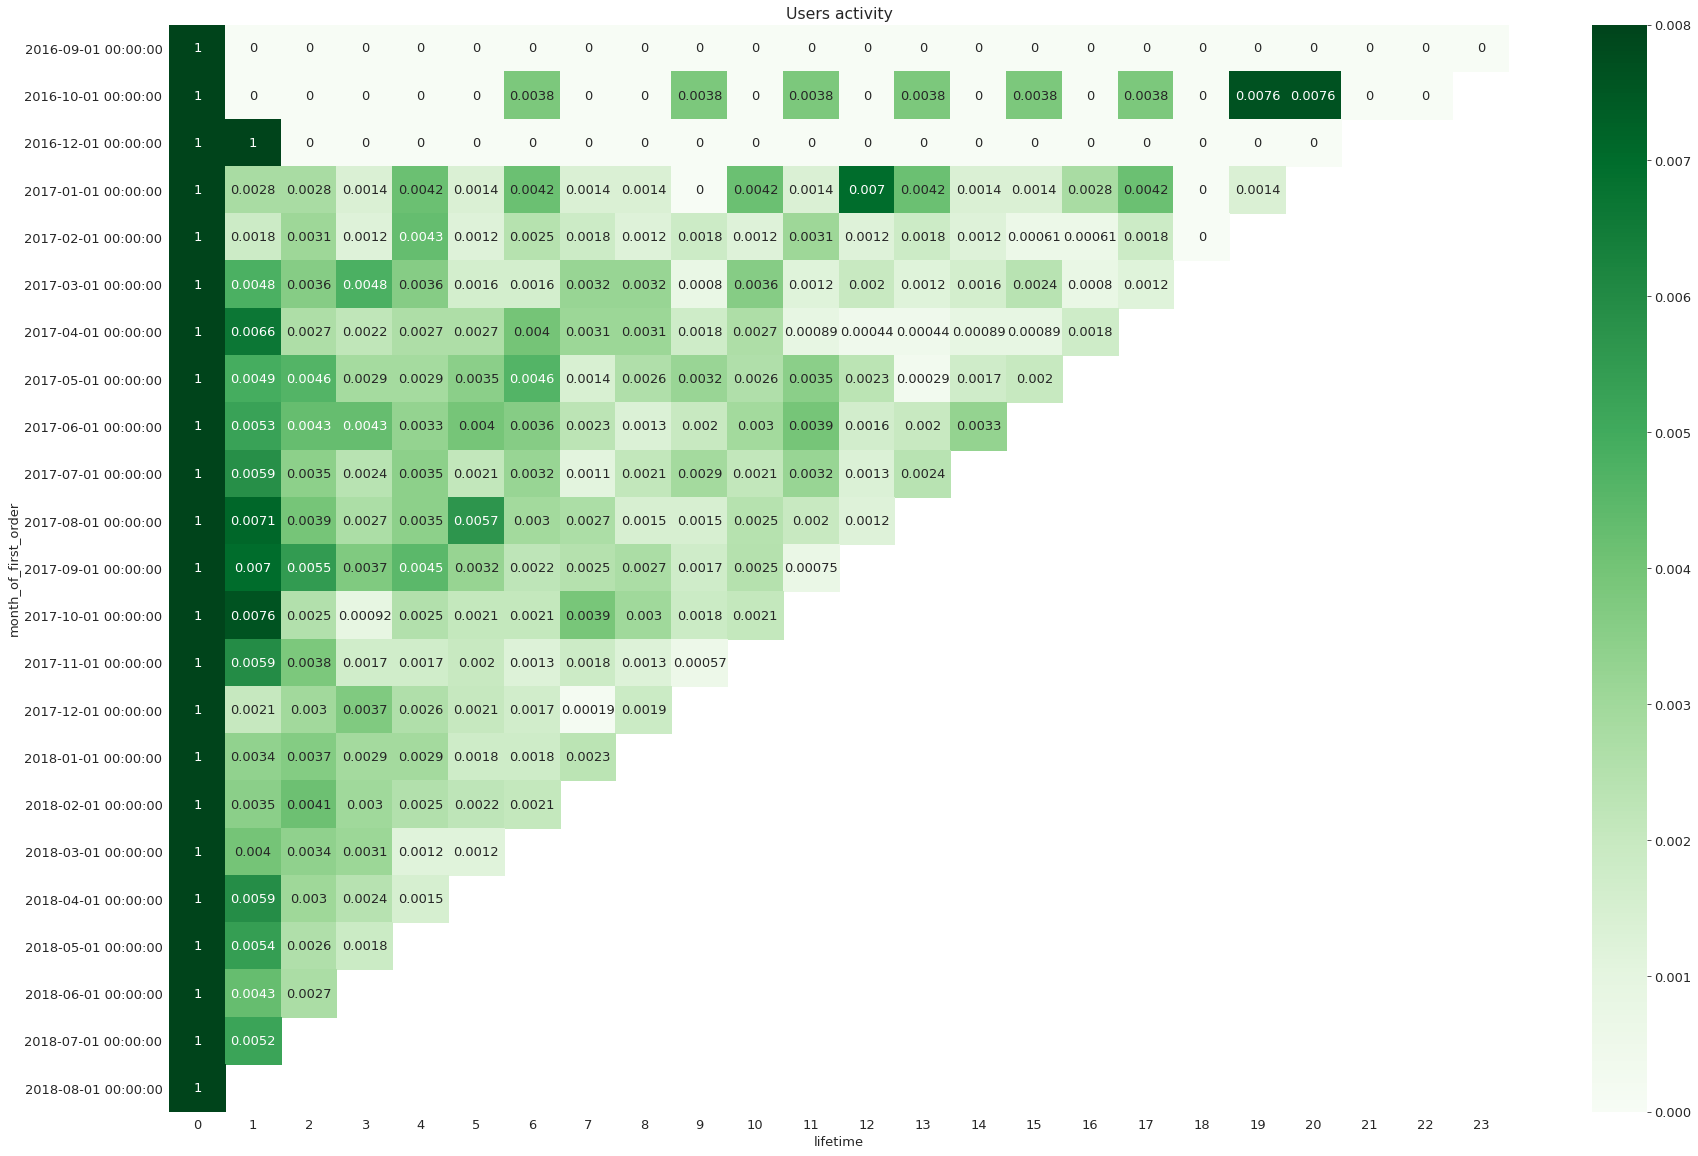

In [54]:
plt.rcParams['font.size'] = '13'
plt.figure(figsize=(30,20))
plt.title('Users activity')
ax = sns.heatmap(data=retention, annot=True, vmin=0.0,vmax=0.008 ,cmap='Greens')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()

plt.show()

#хитмап всего датафрейма

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [55]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [56]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [57]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [58]:
info = olist_customers.merge(olist_orders, on = 'customer_id')

In [59]:
info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [60]:
rfm = info.merge(olist_order_items, on = 'order_id', how = 'left')

In [61]:
rfm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [62]:
rfm = rfm.query('order_status == "delivered"')

In [63]:
rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [64]:
rfm_by_customers = rfm[['customer_unique_id','order_id','order_purchase_timestamp','price']]
### оставляем нужные столбцы

In [65]:
rfm_by_customers.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


In [66]:
rfm_by_customers.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object

In [67]:
print('Orders from {} to {}'.format(rfm_by_customers['order_purchase_timestamp'].min(),
                                    rfm_by_customers['order_purchase_timestamp'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:00:37


In [68]:
rfm_by_customers.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']).agg({'price': lambda x: x.sum()}).reset_index()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90
...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,299.99
96474,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,0da9fe112eae0c74d3ba1fe16de0988b,350.00
96475,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,99.90
96476,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,55.99


In [69]:
rfm_by_customers['delta'] = rfm_by_customers.order_purchase_timestamp.max() - rfm_by_customers.order_purchase_timestamp

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
rfm_by_customers.groupby('customer_unique_id').agg({'order_purchase_timestamp':'min'})\
                .rename

<bound method DataFrame.rename of                                  order_purchase_timestamp
customer_unique_id                                       
0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42
...                                                   ...
fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16
ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41
ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45

[93358 rows x 1 columns]>

In [71]:
rfm_by_customers

,customer_unique_id,order_id,order_purchase_timestamp,price,delta
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,469 days 23:55:02
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,228 days 18:12:13
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,101 days 22:52:52
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,168 days 22:53:59
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,31 days 05:09:07
...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90,143 days 23:12:20
113421,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90,147 days 06:40:15
113422,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00,142 days 18:48:47
113423,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00,298 days 17:52:04


In [72]:
def r_score(x):
    if x <= datetime.timedelta(days=30):
        return 5
    elif datetime.timedelta(days=30) < x <= datetime.timedelta(days=90):
        return 4
    elif datetime.timedelta(days=90) < x <= datetime.timedelta(days=182):
        return 3
    elif datetime.timedelta(days=182) < x <= datetime.timedelta(days=365):
        return 2
    else:
        return 1

In [73]:
rfm_by_customers['r_score']= rfm_by_customers['delta']\
                                       .apply(lambda x: r_score(x))
#### 1 — новые клиенты - до 30 дней;
#### 2 — относительно новые клиенты (30-90);
#### 3 — клиенты, которые с нами от 3 месяцев до полугода.
#### 4 — лояльные клиенты (от полугода до года с нами).
#### 5 — самые верные клиенты (больше года с нами)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
rfm_by_customers.customer_unique_id = rfm_by_customers.customer_unique_id.drop_duplicates()

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
rfm_by_customers

,customer_unique_id,order_id,order_purchase_timestamp,price,delta,r_score
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,469 days 23:55:02,1
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,228 days 18:12:13,2
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,101 days 22:52:52,3
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,168 days 22:53:59,3
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,31 days 05:09:07,4
...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,74.90,143 days 23:12:20,3
113421,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,114.90,147 days 06:40:15,3
113422,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,37.00,142 days 18:48:47,3
113423,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,689.00,298 days 17:52:04,2


In [76]:
info.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [77]:
number_of_customer_orders = info.query('order_status == "delivered"')\
    .groupby('customer_unique_id', as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns={"order_id": "number_of_orders"})
#посчитаем сколько заказов сделал каждый клиент

In [78]:
number_of_customer_orders.head()

,customer_unique_id,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [79]:
def f_score(x):
    if x <= 1:
        return 1
    elif 1 < x < 3:
        return 2
    elif 3 < x <= 4:
        return 3
    elif 4 < x <= 5:
        return 4
    else:
        return 5

In [80]:
number_of_customer_orders['F_score'] = number_of_customer_orders['number_of_orders']\
                                       .apply(lambda x: f_score(x))
#### 1 — клиент совершил 1 заказ;
#### 2 — клиент совершил 2-3 заказа;
#### 3 — клиент совершил 4 заказа.
#### 4 — клиент совершил 5 заказов.
#### 5 — клиент совершает покупки часто, больше 5 заказов.

In [81]:
number_of_customer_orders

,customer_unique_id,number_of_orders,F_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1,1
93355,ffff371b4d645b6ecea244b27531430a,1,1
93356,ffff5962728ec6157033ef9805bacc48,1,1


In [82]:
M_score = rfm_by_customers.groupby('customer_unique_id', as_index = False)\
                          .agg({'price':'sum'})\
                          .rename(columns={"price": "summ"})
# посчитаем сколько денег потратил каждый клиент

In [83]:
def m_score(x):
    if x <= 30:
        return 1
    elif 30 < x <= 60:
        return 2
    elif 60 < x <= 90:
        return 3
    elif 90 < x <= 120:
        return 4
    else:
        return 5

In [84]:
M_score['M_score'] = M_score['summ'].apply(lambda x: m_score(x))
#### 1 — маленькая сумма заказа до 30 у.е;
#### 2 — чуть больше сумма заказа от 30 до 60 у.е.;
#### 3 — средняя сумма заказа от 60 до 90 у.е.;
#### 4 — большая сумма заказа от 90 до 120 у.е.;
#### 5 — большая сумма заказа более 120 у.е..

In [85]:
M_score

,customer_unique_id,summ,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,3
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,5
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,890.00,5
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,3
93355,ffff371b4d645b6ecea244b27531430a,89.90,3
93356,ffff5962728ec6157033ef9805bacc48,115.00,4


In [86]:
M_score.summ.describe()

count    93358.000000
mean       125.846420
std        191.450834
min          0.850000
25%         41.892500
50%         79.000000
75%        139.900000
max       6735.000000
Name: summ, dtype: float64

In [87]:
FM = M_score.merge(number_of_customer_orders, on = 'customer_unique_id')

In [88]:
RFM = rfm_by_customers.merge(FM,on = 'customer_unique_id')

In [89]:
RFM = RFM[['customer_unique_id','r_score','F_score','M_score']]

In [90]:
RFM

,customer_unique_id,r_score,F_score,M_score
0,861eff4711a542e4b93843c6dd7febb0,1,1,5
1,290c77bc529b7ac935b93aa66c333dc3,2,1,5
2,060e732b5b29e8181a18229c7b0b2b5e,3,1,5
3,259dac757896d24d7702b9acbbff3f3c,3,1,5
4,345ecd01c38d18a9036ed96c73b8d066,4,1,5
...,...,...,...,...
93353,1a29b476fee25c95fbafc67c5ac95cf8,3,1,3
93354,d52a67c98be1cf6a5c84435bd38d095d,3,1,4
93355,e9f50caf99f032f0bf3c55141f019d99,3,1,2
93356,73c2643a0a458b49f58cea58833b192e,2,1,5


In [91]:
RFM['RFM_Score'] = RFM.r_score.astype(str) + RFM.F_score.astype(str) + RFM.M_score.astype(str)

In [92]:
RFM

,customer_unique_id,r_score,F_score,M_score,RFM_Score
0,861eff4711a542e4b93843c6dd7febb0,1,1,5,115
1,290c77bc529b7ac935b93aa66c333dc3,2,1,5,215
2,060e732b5b29e8181a18229c7b0b2b5e,3,1,5,315
3,259dac757896d24d7702b9acbbff3f3c,3,1,5,315
4,345ecd01c38d18a9036ed96c73b8d066,4,1,5,415
...,...,...,...,...,...
93353,1a29b476fee25c95fbafc67c5ac95cf8,3,1,3,313
93354,d52a67c98be1cf6a5c84435bd38d095d,3,1,4,314
93355,e9f50caf99f032f0bf3c55141f019d99,3,1,2,312
93356,73c2643a0a458b49f58cea58833b192e,2,1,5,215


In [93]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

RFM['Segment'] = RFM.r_score.astype(str) + RFM.F_score.astype(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,customer_unique_id,r_score,F_score,M_score,RFM_Score,Segment
0,861eff4711a542e4b93843c6dd7febb0,1,1,5,115,hibernating
1,290c77bc529b7ac935b93aa66c333dc3,2,1,5,215,hibernating
2,060e732b5b29e8181a18229c7b0b2b5e,3,1,5,315,about to sleep
3,259dac757896d24d7702b9acbbff3f3c,3,1,5,315,about to sleep
4,345ecd01c38d18a9036ed96c73b8d066,4,1,5,415,promising


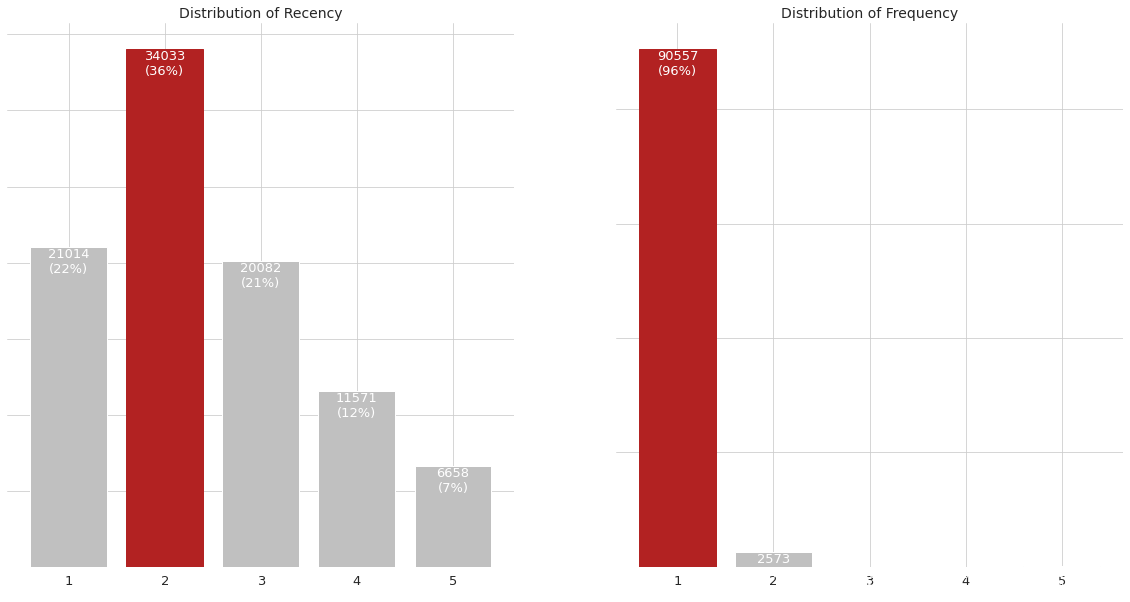

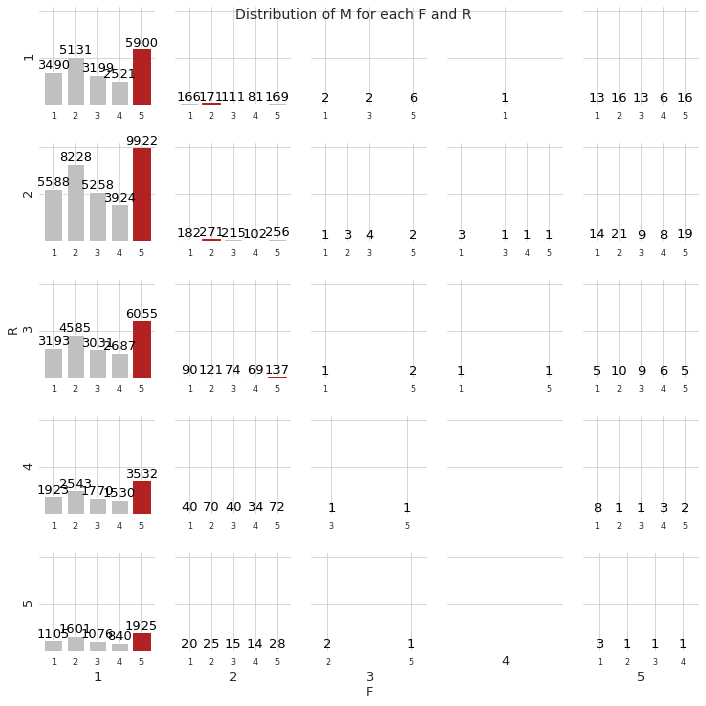

In [94]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

for i, p in enumerate(['r_score', 'F_score']):
    parameters = {'r_score':'Recency', 'F_score':'Frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['r_score'] == r) & (RFM['F_score'] == f)]['M_score'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

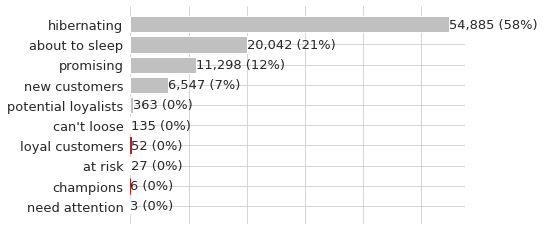

In [95]:
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [96]:
RFM_info = RFM.groupby('RFM_Score', as_index =False).agg({'customer_unique_id':'count'}).rename(columns={"customer_unique_id": "number"})
RFM_info['percentage'] = round((RFM_info['number'] * 100) / RFM_info['number'].sum(),2)

In [97]:
RFM_info.sort_values('percentage', ascending=False)

,RFM_Score,number,percentage
23,215,9922,10.63
20,212,8228,8.81
46,315,6055,6.49
4,115,5900,6.32
19,211,5588,5.99
...,...,...,...
52,331,1,0.00
53,335,2,0.00
54,341,1,0.00
55,345,1,0.00


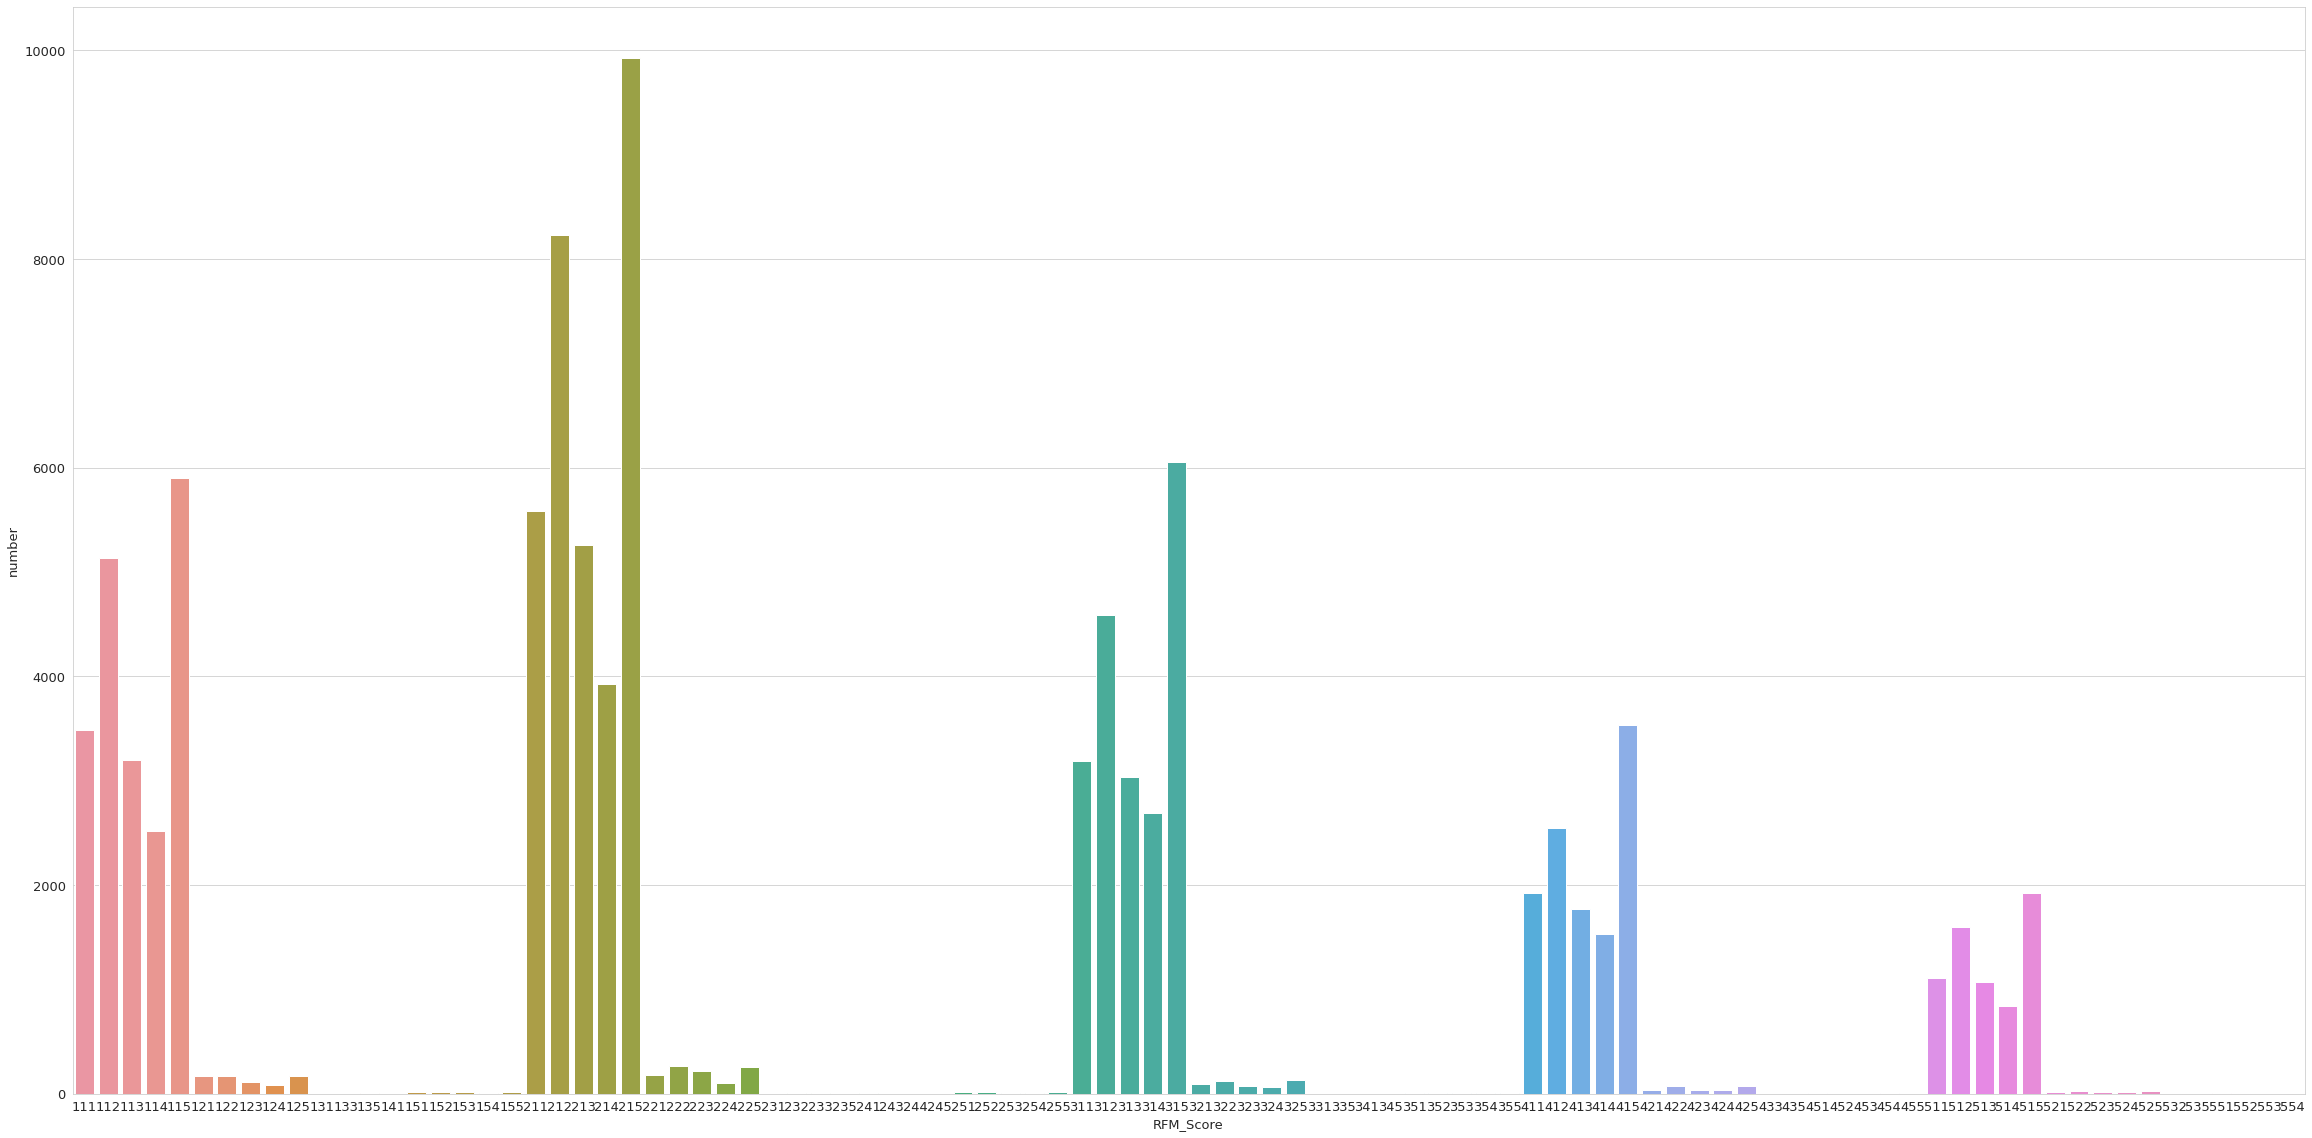

In [98]:
plt.figure(figsize=(40,20))
sns.barplot(data = RFM_info , x='RFM_Score', y= 'number')

### Ответ:
Как видно из таблицы, основую массу занимают клиенты с RFM Score = 215, их 10,63% ,клиенты которые совершили свой единственный заказ на сумму более 120 у.е. последние полгода-год назад